In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('placement.csv')

In [3]:
df.head()

,Unnamed: 0,cgpa,iq,placement
0,0,6.8,123.0,1
1,1,5.9,106.0,0
2,2,5.3,121.0,0
3,3,7.4,132.0,1
4,4,5.8,142.0,0


In [7]:
df.drop('Unnamed: 0',axis=1, inplace=True)

In [8]:
df.sample(10)

,cgpa,iq,placement
68,4.0,75.0,0
6,5.7,143.0,0
46,5.3,114.0,0
5,7.1,48.0,1
62,6.0,102.0,0
74,6.7,154.0,1
65,8.1,166.0,1
93,6.8,112.0,1
70,6.3,127.0,1
10,6.0,45.0,1


In [9]:
df.shape

(100, 3)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   cgpa       100 non-null    float64
 1   iq         100 non-null    float64
 2   placement  100 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 2.5 KB


In [ ]:
# Steps:
# 0. Preprocessing + EDA + Feature Selection
# 1. Extrace input and output columns
# 2. Scale the values
# 3. Train test split
# 4. Train the model
# 5. Evalute the model / model selection
# 6. Deploy the model

### EDA

In [11]:
import matplotlib.pyplot as plt

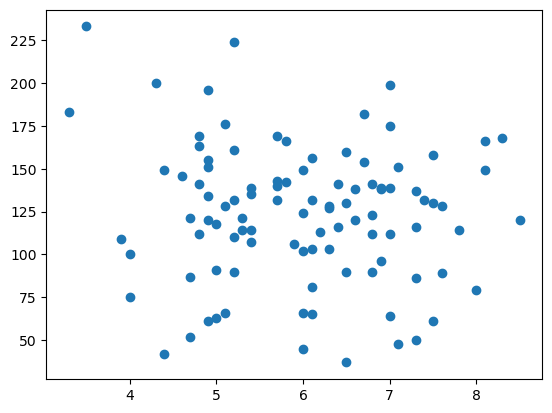

In [12]:
plt.scatter(df['cgpa'],df['iq'])

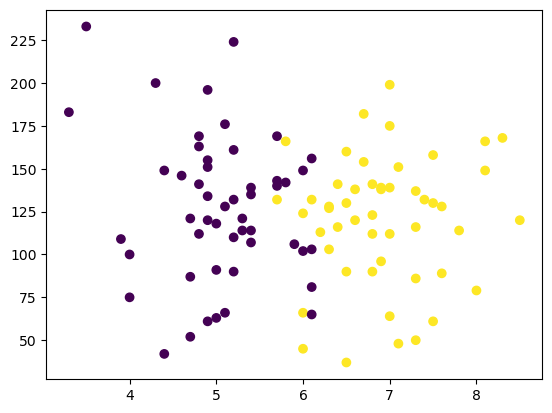

In [14]:
plt.scatter(df['cgpa'],df['iq'],c=df['placement'])

### Feature Selection

### Extrace Input Output Columns

In [16]:
X = df.drop('placement',axis=1)
y = df['placement']

In [19]:
X.shape

(100, 2)

In [20]:
y.shape

(100,)

### Scaling

In [28]:
from sklearn.preprocessing import StandardScaler

In [29]:
scaler = StandardScaler()

In [30]:
X_scaled = scaler.fit_transform(X)

### Train Test Split

In [21]:
from sklearn.model_selection import train_test_split

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled,y, test_size=0.1)

In [42]:
X_train.shape

(90, 2)

In [43]:
X_test.shape

(10, 2)

In [44]:
from sklearn.linear_model import LogisticRegression

In [45]:
clf = LogisticRegression()

In [46]:
clf.fit(X_train,y_train)

LogisticRegression()

### Evaluate the model

In [50]:
y_pred = clf.predict(X_test)
y_pred

array([1, 1, 1, 1, 1, 0, 1, 1, 0, 1], dtype=int64)

In [49]:
y_test

20    1
42    1
38    1
70    1
30    1
86    0
90    1
29    1
12    0
66    1
Name: placement, dtype: int64

In [51]:
from sklearn.metrics import accuracy_score

In [52]:
accuracy_score(y_test,y_pred)

1.0

In [53]:
from mlxtend.plotting import plot_decision_regions

<Axes: >

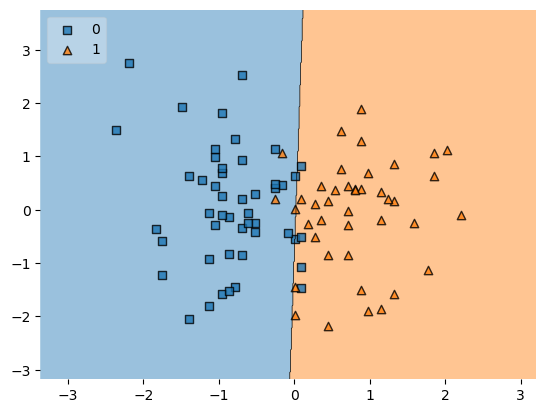

In [54]:
plot_decision_regions(X_train,y_train.values, clf = clf, legend=2)

In [55]:
import pickle

In [56]:
pickle.dump(clf,open('model.pkl','wb'))